### Download Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1AdW5Y8jvj7wQJrkvBeMEMJwqY-hZPB0W

Downloading...
From: https://drive.google.com/uc?id=1AdW5Y8jvj7wQJrkvBeMEMJwqY-hZPB0W
To: /content/data.csv
100% 527k/527k [00:00<00:00, 113MB/s]


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

### Read .csv & Call .info

In [ ]:
# PART1
# Load the dataset from the specified file path
data = pd.read_csv('/content/data.csv')
# Display the first few rows of the DataFrame
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

###  Display the number of data that are NaN for each column

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# Remove rows with any null values
data.dropna(inplace=True)

In [ ]:
# Select columns with numerical data types
num = data.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

### Correlation Matrix of numerical columns

<Axes: >

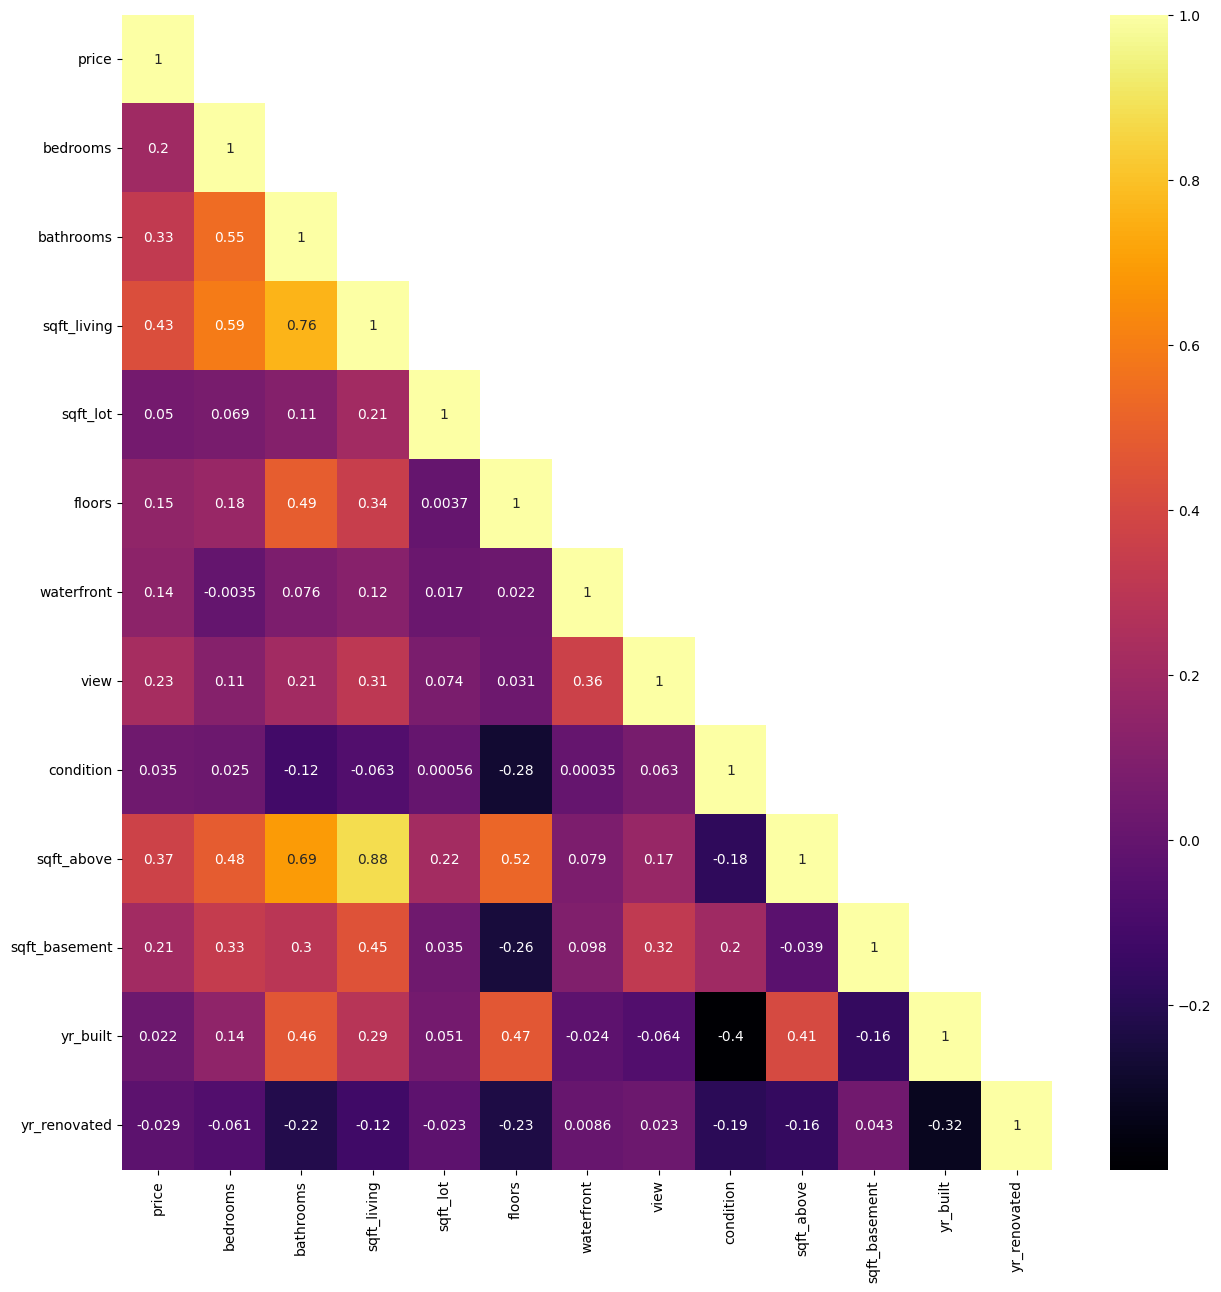

In [ ]:
# PART2
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(data[num].corr(), annot=True, cmap='inferno', mask=np.triu(data[num].corr(), k=1))

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = data.corr()['price'].sort_values(ascending=False)
correlation_matrix

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

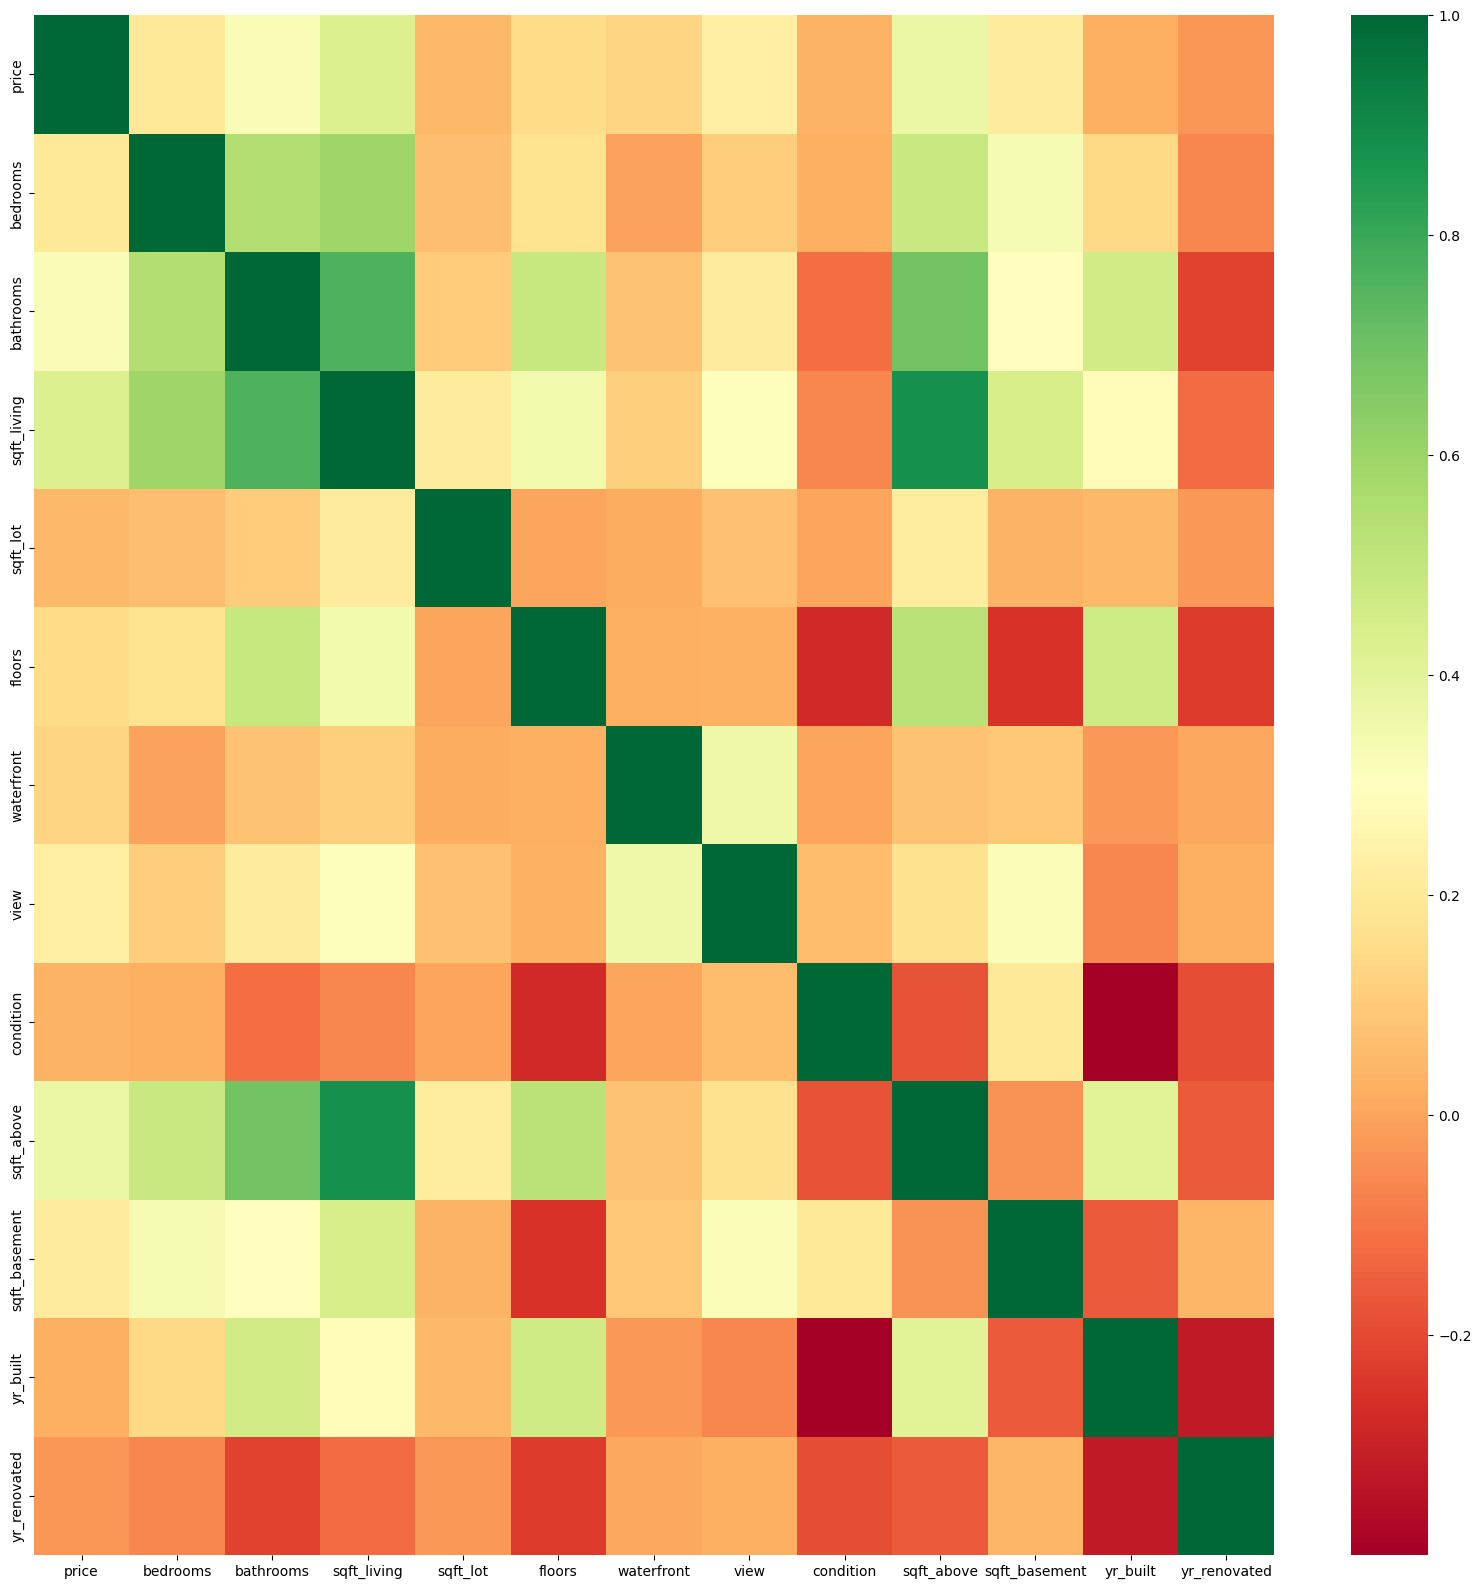

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap="RdYlGn")
plt.show()

### Distribution of Numeric Variables

Text(0.5, 1.0, 'yr_renovated Interval')

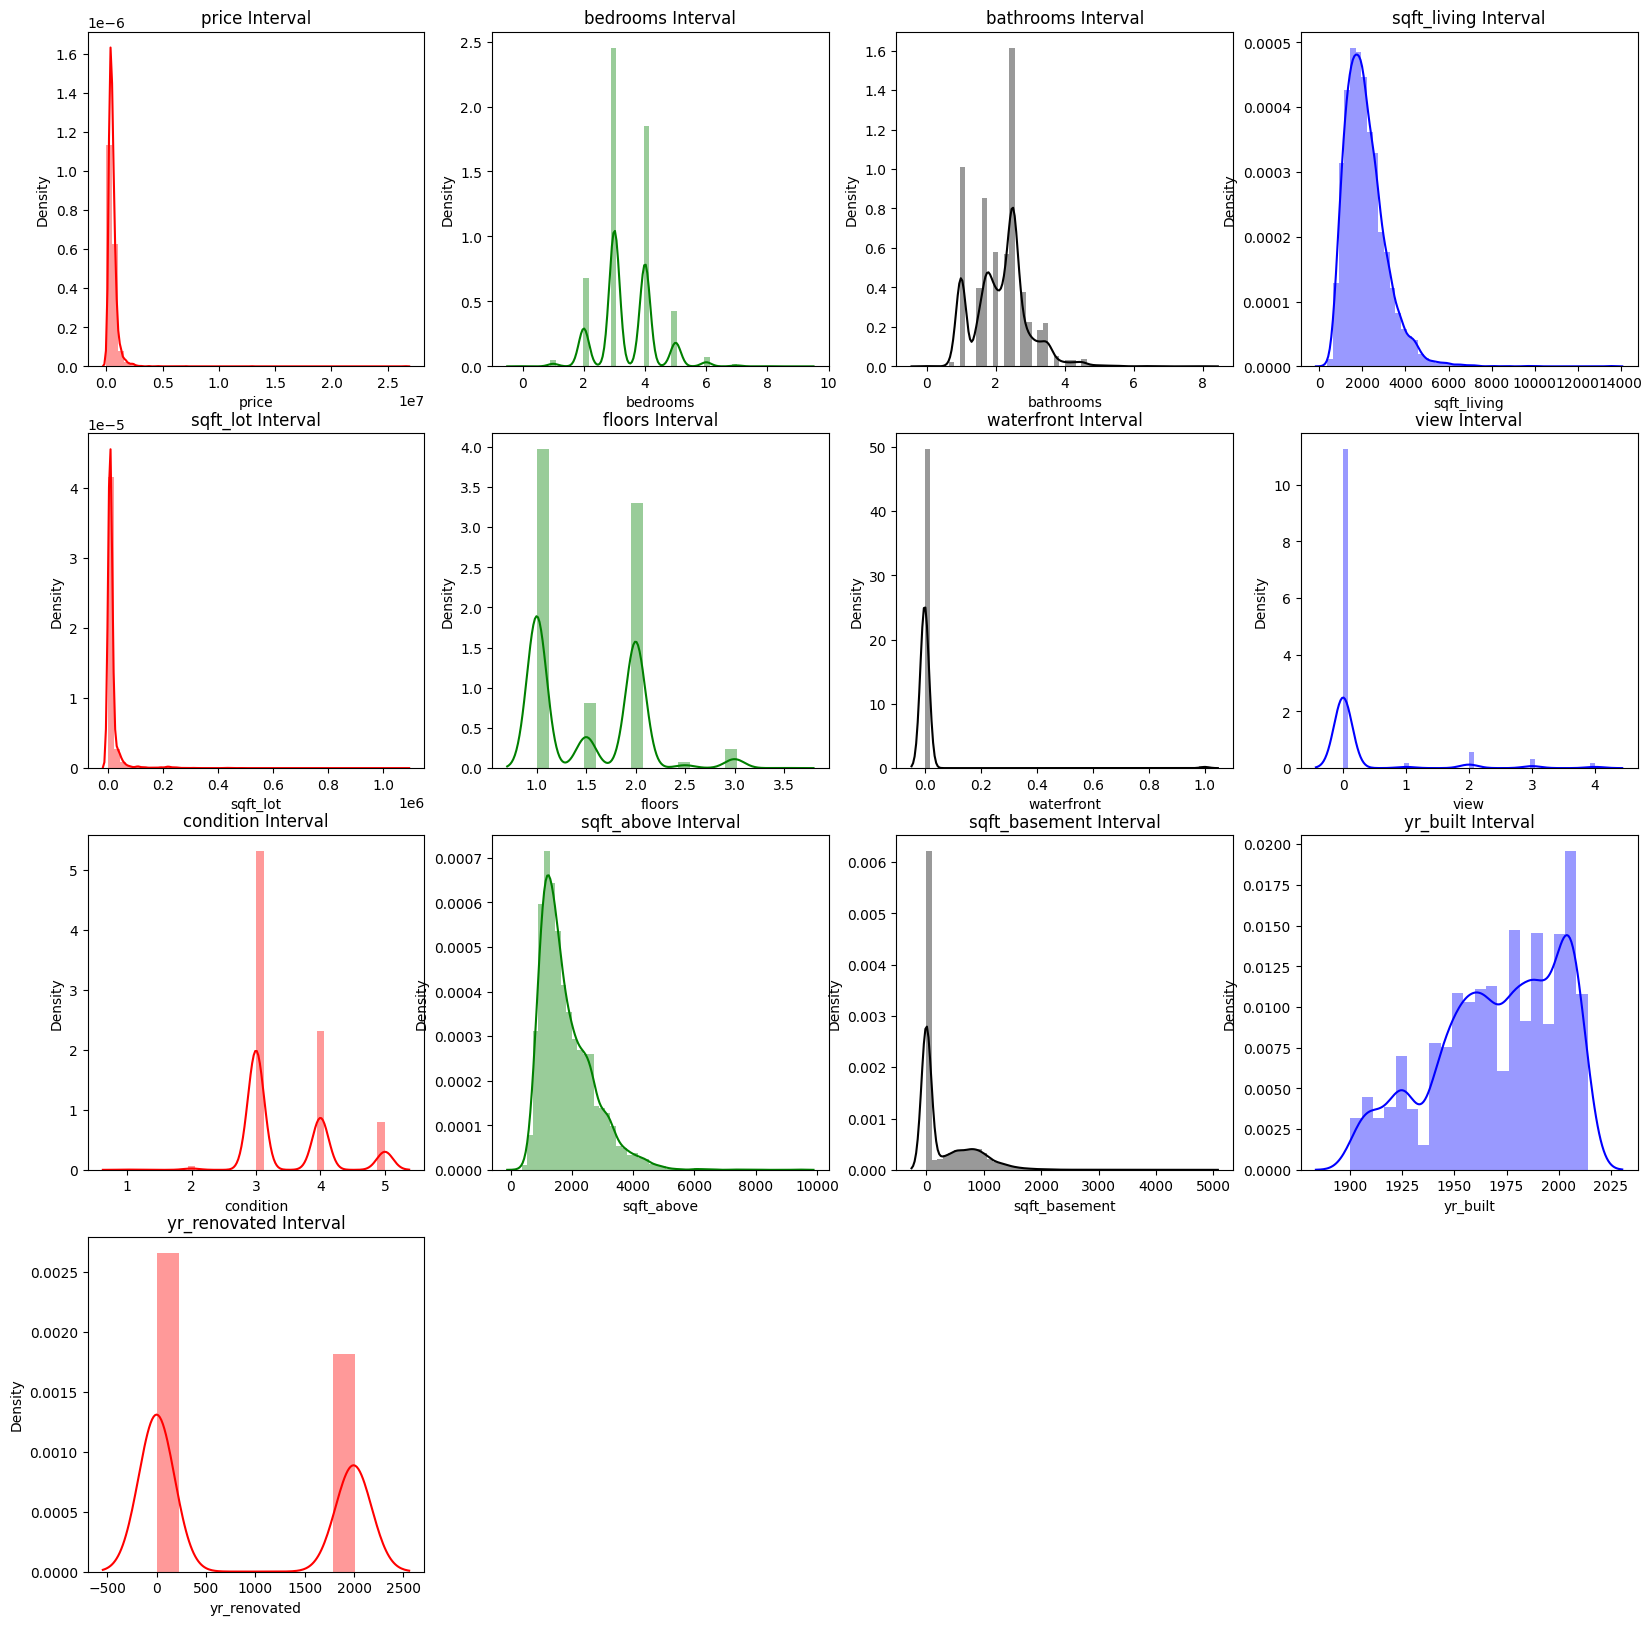

In [ ]:
# PART3
# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(data['price'], color="red").set_title('price Interval')

plt.subplot(4,4,2)
sns.distplot(data['bedrooms'], color="green").set_title('bedrooms Interval')

plt.subplot(4,4,3)
sns.distplot(data['bathrooms'], color="black").set_title('bathrooms Interval')

plt.subplot(4,4,4)
sns.distplot(data['sqft_living'], color="blue").set_title('sqft_living Interval')

plt.subplot(4,4,5)
sns.distplot(data['sqft_lot'], color="red").set_title('sqft_lot Interval')

plt.subplot(4,4,6)
sns.distplot(data['floors'], color="green").set_title('floors Interval')

plt.subplot(4,4,7)
sns.distplot(data['waterfront'], color="black").set_title('waterfront Interval')

plt.subplot(4,4,8)
sns.distplot(data['view'], color="blue").set_title('view Interval')

plt.subplot(4,4,9)
sns.distplot(data['condition'], color="red").set_title('condition Interval')

plt.subplot(4,4,10)
sns.distplot(data['sqft_above'], color="green").set_title('sqft_above Interval')

plt.subplot(4,4,11)
sns.distplot(data['sqft_basement'], color="black").set_title('sqft_basement Interval')

plt.subplot(4,4,12)
sns.distplot(data['yr_built'], color="blue").set_title('yr_built Interval')

plt.subplot(4,4,13)
sns.distplot(data['yr_renovated'], color="red").set_title('yr_renovated Interval')

### Plot Distribution

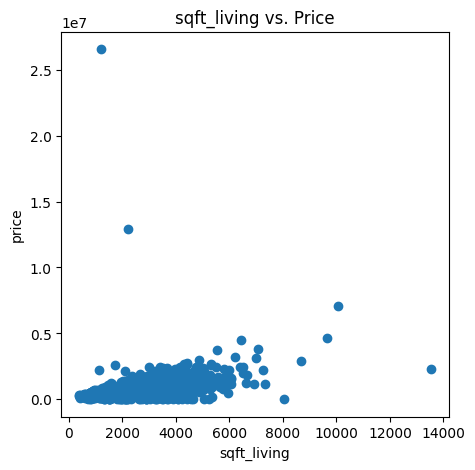

In [ ]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=data)
plt.xlabel('sqft_living')
plt.title('sqft_living vs. Price')
plt.ylabel('price')
plt.show()

### Convert the Date column to the month and year columns and delete the date column

In [ ]:
# Extract 'year', 'month', and 'day' from the 'date' column
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

# Show the DataFrame with the separate 'year' and 'month' columns
data = data[['year', 'month'] + [col for col in data.columns if col not in ['year', 'month']]]

# Drop the specified columns from the DataFrame
data = data.drop(['date'], axis=1)
data

,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# Drop year columns from the DataFrame
data = data.drop(['year'], axis=1)
data

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## Convert descriptive data to numerical data

In [ ]:
# List of specified categorical columns
dummy = ['city']
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(data, columns=dummy, drop_first=True)

# Display the first few rows of the modified DataFrame
df2.head()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,5,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,5,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,5,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,5,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,5,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,0,1,0,0,0,0,0,0,0,0


### Split and Normalize Data

In [ ]:
# PART5
x = df2.drop(["price"], axis=1)  # features
y = df2["price"]                  # Output data

### Train Test Split

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=83, shuffle=True)
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 59)
X Test Scaler :  (920, 59)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


### Min-Max Scaler

minmax normalization
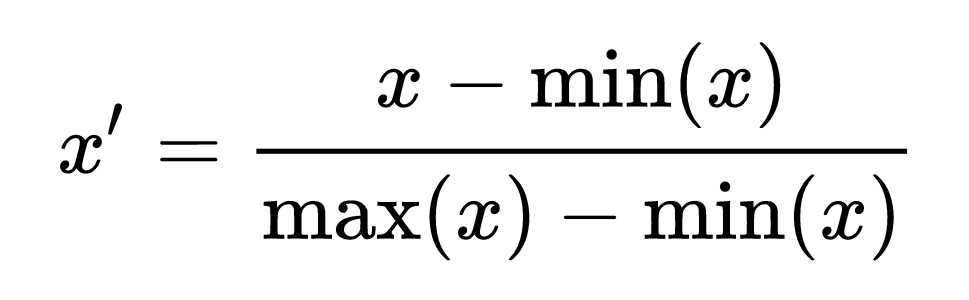

In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

## MLP with 3 hidden layer

In [ ]:
model_3 = Sequential()

# Add the first hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                600       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 831 (3.25 KB)
Trainable params: 831 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit model_3

In [ ]:
model_3.compile(optimizer='adam', loss='mse')

# Split the data into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=83, shuffle=True)

history = model_3.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=0)

In [ ]:
# Evaluate the model
loss = model_3.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 3.8421e-04


In [92]:
# Predictions on training and validation data
y_pred_3_train = model_3.predict(x_train1)
y_pred_3_val = model_3.predict(x_val)

# Calculate R2 score for training and validation data
rscore_train = r2_score(y_train1, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

# Calculate R2 score for testing data
y_pred_3_test = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

29/29 [==============================] - 0s 3ms/step
Test R2score: 0.23508013075766343
Train R2score: 0.40149585006740107
Validation R2score: 0.47556535537963096


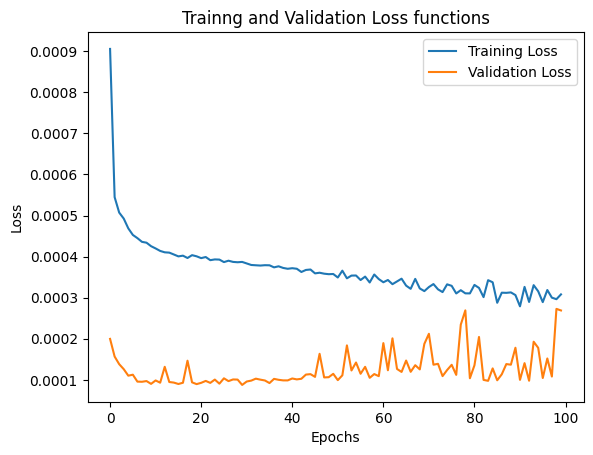

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()

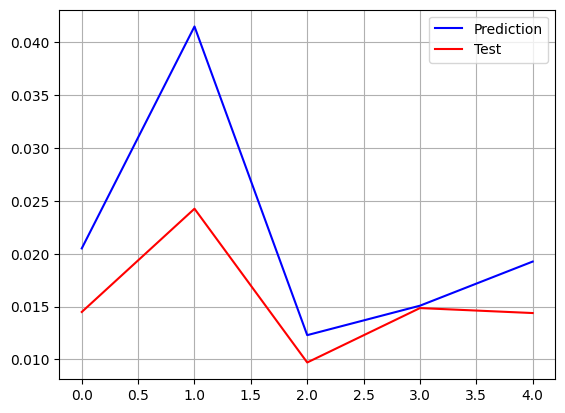

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_train))
  random_pred.append(y_pred_3_train[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

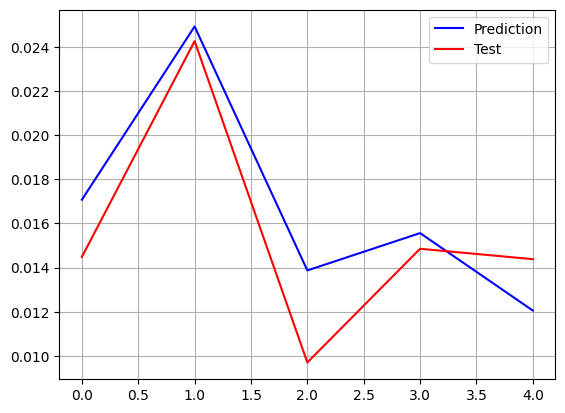

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_test))
  random_pred.append(y_pred_3_test[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

### SGD + MAE

In [ ]:
# PART7
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_3.compile(optimizer = 'sgd',loss = 'mae')

# Split the data into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=83, shuffle=True)

history = model_3.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=0)

# Evaluate the model
loss = model_3.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.0054


In [93]:
# Predictions on training and validation data
y_pred_3_train = model_3.predict(x_train1)
y_pred_3_val = model_3.predict(x_val)

# Calculate R2 score for training and validation data
rscore_train = r2_score(y_train1, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

# Calculate R2 score for testing data
y_pred_3_test = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

29/29 [==============================] - 0s 1ms/step
Test R2score: 0.23508013075766343
Train R2score: 0.40149585006740107
Validation R2score: 0.47556535537963096


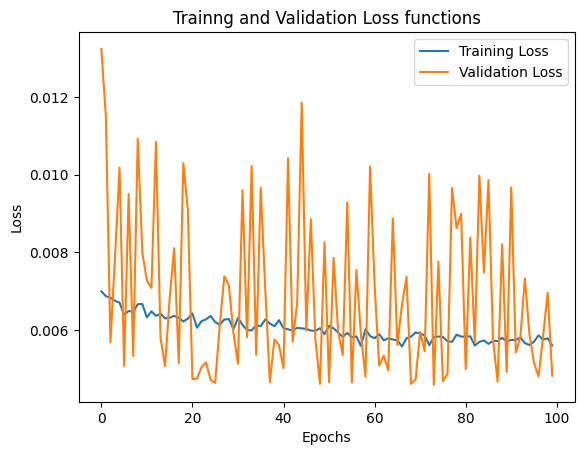

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()

## Prediction

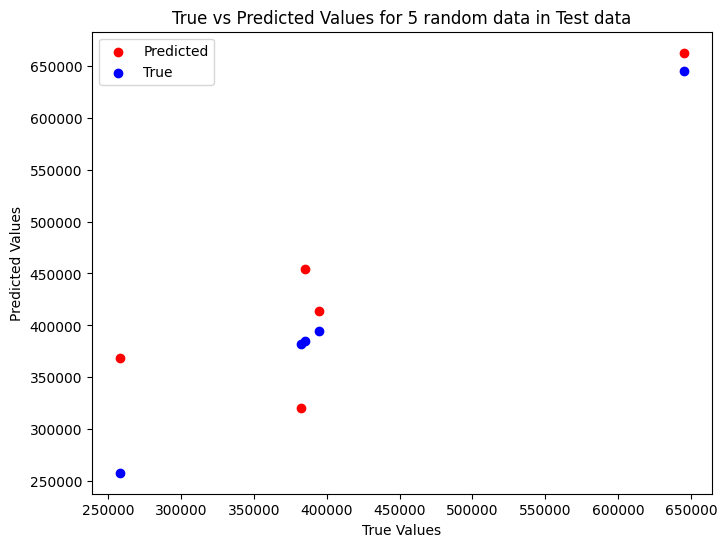

In [ ]:
# PART8
# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_3_test)

random_pred = []
random_test = []

for i in range(5):
  j = random.randint(0, len(y_test_unscaled))
  random_pred.append(y_pred_unscaled[i])
  random_test.append(y_test_unscaled[i])

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(random_test, random_pred, color='red', label='Predicted')
plt.scatter(random_test, random_test, color='blue', label='True')
plt.title('True vs Predicted Values for 5 random data in Test data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

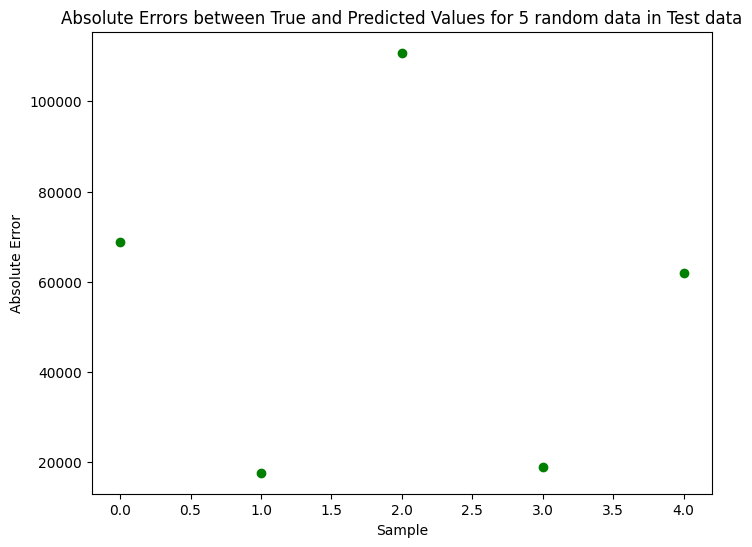

In [ ]:
# Assuming random_test and random_pred are lists
random_test = np.array(random_test)
random_pred = np.array(random_pred)

# Calculate errors between true and predicted values
errors = np.abs(random_test - random_pred)

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values for 5 random data in Test data')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()

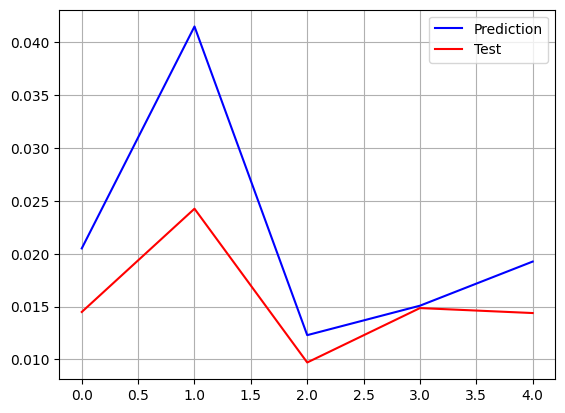

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_train))
  random_pred.append(y_pred_3_train[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

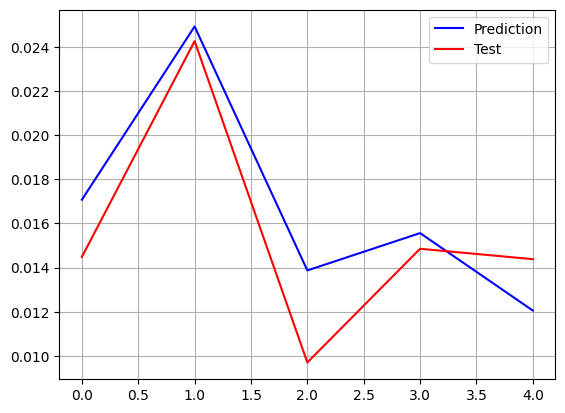

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_test))
  random_pred.append(y_pred_3_test[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

In [ ]:
print("True values:")
print(random_test)
print("\nPredicted values:")
print(random_pred)

True values:
[array([0.01448665]), array([0.02425724]), array([0.0097076]), array([0.01485521]), array([0.01438511])]

Predicted values:
[array([0.0170771], dtype=float32), array([0.02491937], dtype=float32), array([0.0138745], dtype=float32), array([0.0155649], dtype=float32), array([0.01205927], dtype=float32)]
